# 0.2 Clustering Evidence of Streetlights and Crime

Garrett Eason, Chris Broll, Shilpa Rajbhandari

## Background

A Prior randomized control trial found robust crime reductions outside at night (specifically for felony crimes) after the addition of additional temporary light towers were added to York City Housing Authority (NYCHA) housing developments ( http://urbanlabs.uchicago.edu/attachments/store/50eab357f0ee925539c8e72d1f0d6380d7ac0670bec31b63473c1dd7c5e2/Lights+report_10.20.17.pdf ).  In light of this information we conducted an analysis concerning the relationship between semi-random streetlight outage repairs and criminal reporting and found no evidence that streetlight outages affect reportings.  However our initial estimates, because they focused on macro-level data, likely exhibited bias due to a crowding out effect by areas where streetlight outages truly don't have an effect or that effect could not be measured effectively (e.g. areas with high ambient luminance or areas with very low crime rates).  Furthermore, upon micro area considerations, we have found empirical evidence that warrants further study (details below) of the effect of streetlight outages on crime.


### Case Control Comparisons Motivation

So far, our preliminary results have shown there to be generally little to no impact on crime by street light outages.  However, there is some clustering evidence to support the hypothesis that streetlight outages, under particular environmental conditions, might impact crime.  We will proceed by comparing evidence across two areas: the Georgetown Park Shopping area and the 6th Ward of DC.

*NOTE:* The following maps are approximately to scale

In [2]:
#%% Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
import matplotlib.animation as animation

#%pylab notebook
#pylab.rcParams['figure.figsize'] = (12, 12)
#%matplotlib notebook

#%% Locations
Windows = 'C:/Users/Sade/Documents/GitHub/lights-and-crime/Lights and Crime Garrett/Data'
Linux = '/home/sade/Desktop/Git Cloned Repos/lights-and-crime/Lights and Crime Garrett/Data'

choice = Windows

In [32]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [9, 8]

In [4]:
#%% EDA Data
L_full = pd.read_excel(choice + '/Final_Lights.xlsx') # (from 0.1)
L_yesCR_dup_only = pd.read_excel(choice + '/Rampage.xlsx') # (from 0.1)
NightCrimes = pd.read_excel(choice + '/NCRold.xlsx') # (from 0.0a)

<IPython.core.display.Javascript object>


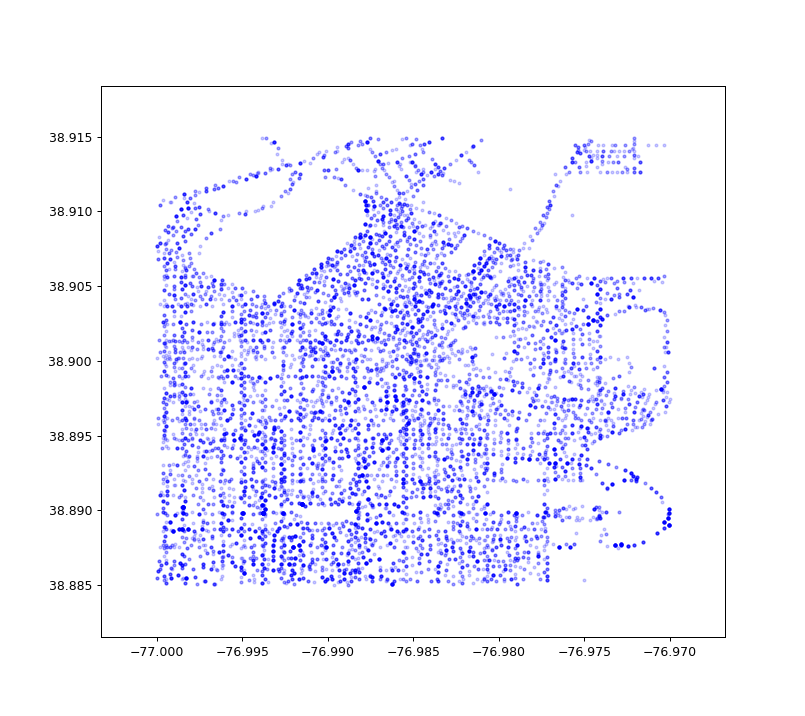

In [53]:
plt.figure(1)
mask1 = (L_full['gpsX_CR'] >= -77) & (L_full['gpsX_CR'] <= -76.970) & (L_full['gpsY_CR'] >= 38.885) & (L_full['gpsY_CR'] <= 38.915)
plt.scatter(L_full[mask1].gpsX_CR, L_full[mask1].gpsY_CR, color='b', s=20, marker='.', alpha=.2)

Let us begin by considering D.C.'s 6th Ward.  As you can see in Figure 1 (above), here is a plot of the 6th Ward where the street light outages are plotted with denser outages relected in darker blue circles.

<IPython.core.display.Javascript object>


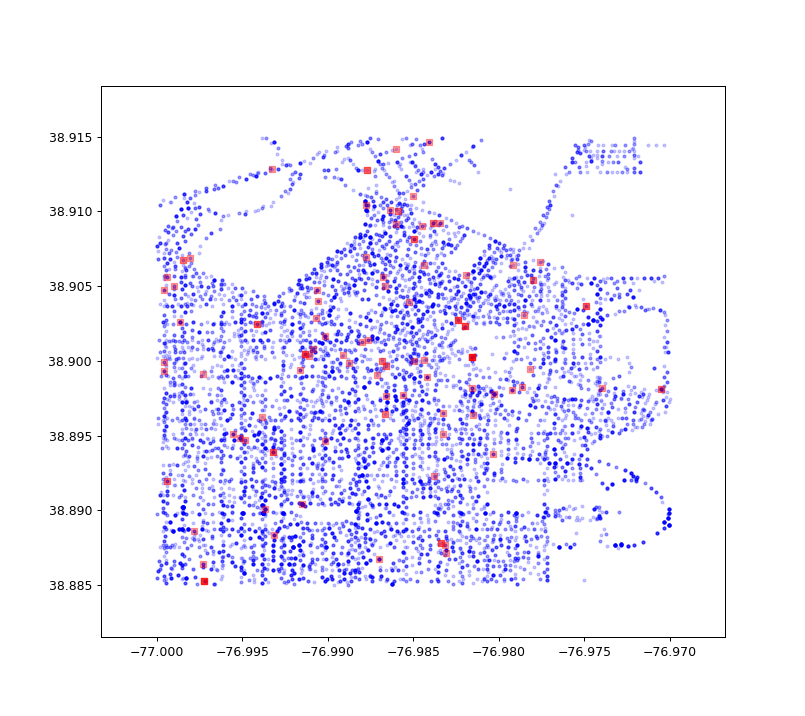

In [52]:
plt.figure(2)
mask1 = (L_full['gpsX_CR'] >= -77) & (L_full['gpsX_CR'] <= -76.970) & (L_full['gpsY_CR'] >= 38.885) & (L_full['gpsY_CR'] <= 38.915)
mask2 = (L_yesCR_dup_only['gpsX_left'] >= -77) & (L_yesCR_dup_only['gpsX_left'] <= -76.970) & (L_yesCR_dup_only['gpsY_left'] >= 38.885) & (L_yesCR_dup_only['gpsY_left'] <= 38.915)
plt.scatter(L_full[mask1].gpsX_CR, L_full[mask1].gpsY_CR, color='b', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only[mask2].gpsX_left, L_yesCR_dup_only[mask2].gpsY_left, color='r', s=20, marker='s', alpha=.2)

Now if we add an indicator for light outages (Figure 2 above) that are tied with two or more crimes we see a relatively random scattering of crimes (red squares that become brighter the denser they are).  This information tells us little about the relationship between light outages and crime, but it might be what we expect under the assumption that the environmental factors are relatively uniform across street lights.

<IPython.core.display.Javascript object>


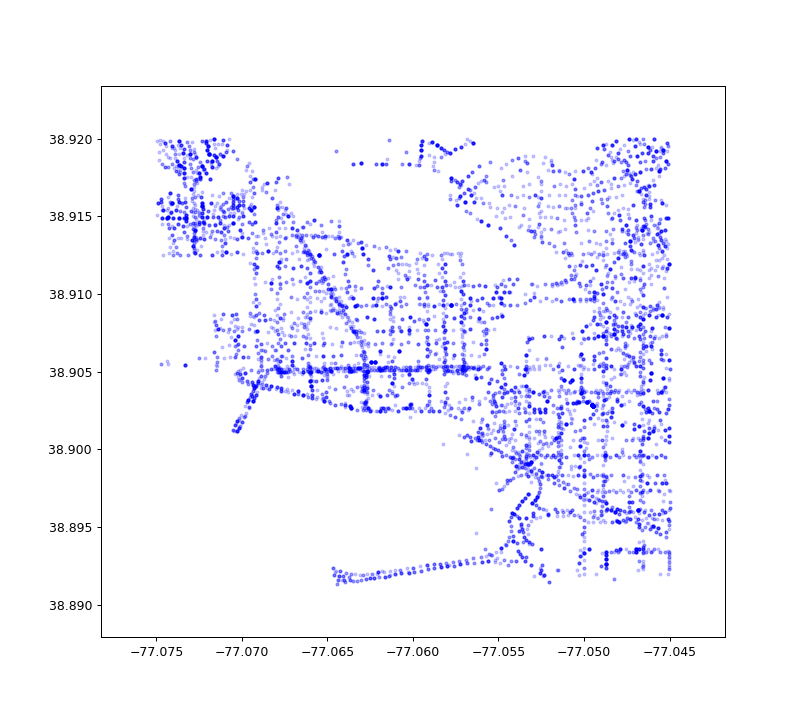

In [42]:
plt.figure(3)
mask1 = (L_full['gpsX_CR'] >= -77.075) & (L_full['gpsX_CR'] <= -77.045) & (L_full['gpsY_CR'] >= 38.890) & (L_full['gpsY_CR'] <= 38.920)
plt.scatter(L_full[mask1].gpsX_CR, L_full[mask1].gpsY_CR, color='b', s=20, marker='.', alpha=.2)

In contrast, let us take a look at Georgetown Park in Figure 3 (above) and Figure 4 (below).

<IPython.core.display.Javascript object>


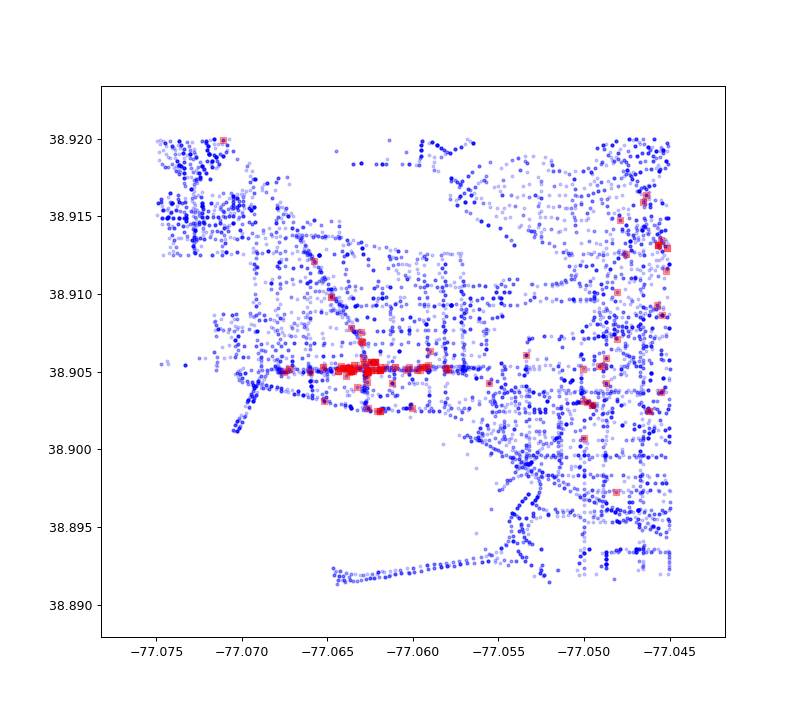

In [43]:
plt.figure(4)
mask1 = (L_full['gpsX_CR'] >= -77.075) & (L_full['gpsX_CR'] <= -77.045) & (L_full['gpsY_CR'] >= 38.890) & (L_full['gpsY_CR'] <= 38.920)
mask2 = (L_yesCR_dup_only['gpsX_left'] >= -77.075) & (L_yesCR_dup_only['gpsX_left'] <= -77.045) & (L_yesCR_dup_only['gpsY_left'] >= 38.890) & (L_yesCR_dup_only['gpsY_left'] <= 38.920)
plt.scatter(L_full[mask1].gpsX_CR, L_full[mask1].gpsY_CR, color='b', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only[mask2].gpsX_left, L_yesCR_dup_only[mask2].gpsY_left, color='r', s=20, marker='s', alpha=.2)

As can be seen, there is a stark clustering around the Georgetown Park shopping area.  This information shows that when a light goes out there is a higher likelyhood of multiple crimes being mapped to that light as opposed to the surrounding area.  This could be the outcome of three reasons that come to mind: first, it could be that there are simply many crimes comitted around this area as compared to other areas; Second, it could be that crimes are reported in this area more often as compared to other areas; third, it could be that we are seeing the outcomes of additional crimes in this area due to the effect of street lights going out.

In [160]:
sub_NCR = NightCrimes[["gpsX","gpsY"]]
x = sub_NCR["gpsX"]
y = sub_NCR["gpsY"]

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Let's try placing a heat map of crime underneath this information and look at these case studies again (Figure 5 and Figure 6 below).

<IPython.core.display.Javascript object>


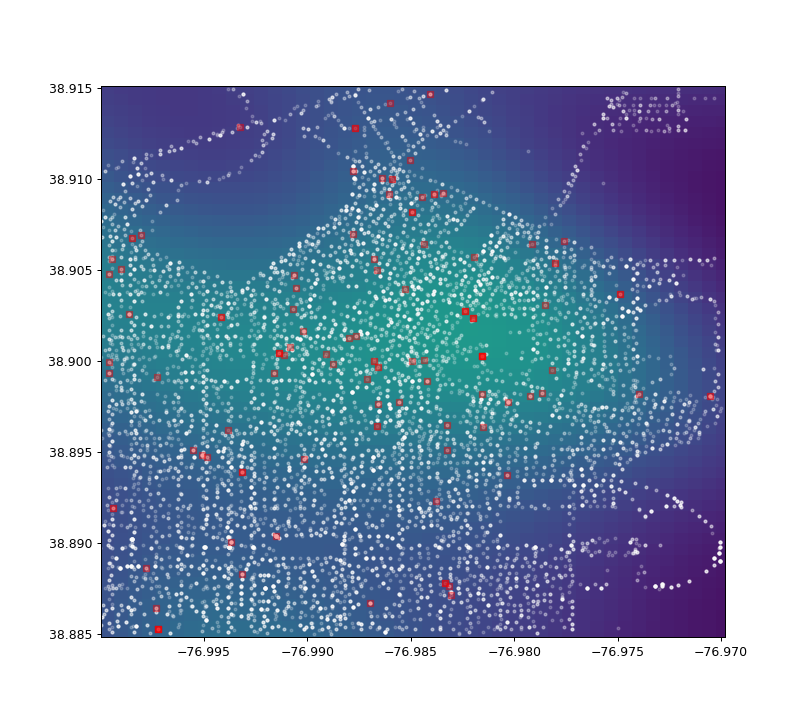

In [166]:
plt.figure(5)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
mask1 = (L_full['gpsX_CR'] >= -77) & (L_full['gpsX_CR'] <= -76.970) & (L_full['gpsY_CR'] >= 38.885) & (L_full['gpsY_CR'] <= 38.915)
mask2 = (L_yesCR_dup_only['gpsX_left'] >= -77) & (L_yesCR_dup_only['gpsX_left'] <= -76.970) & (L_yesCR_dup_only['gpsY_left'] >= 38.885) & (L_yesCR_dup_only['gpsY_left'] <= 38.915)
plt.scatter(L_full[mask1].gpsX_CR, L_full[mask1].gpsY_CR, color='w', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only[mask2].gpsX_left, L_yesCR_dup_only[mask2].gpsY_left, color='r', s=20, marker='s', alpha=.2)

<IPython.core.display.Javascript object>


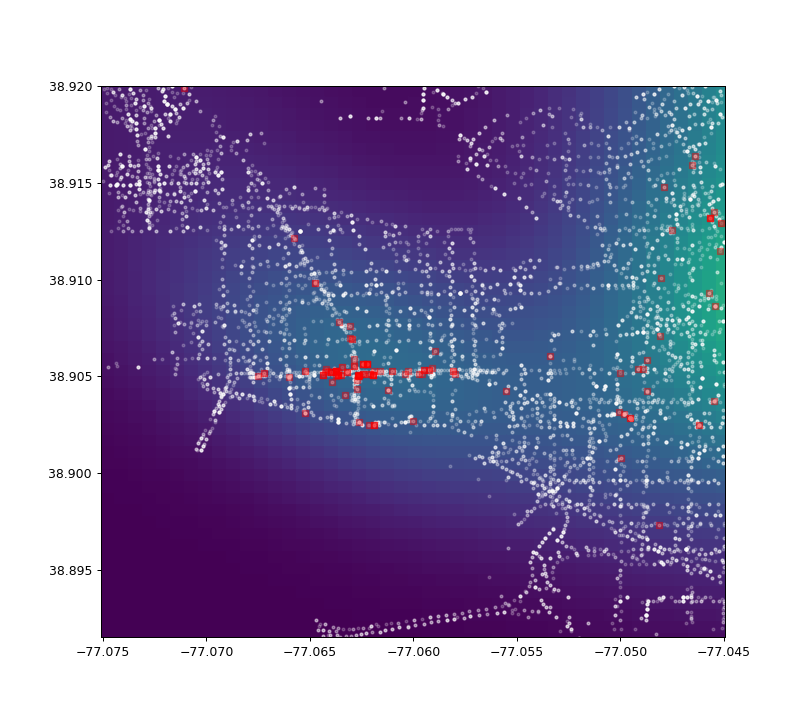

In [167]:
plt.figure(6)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
mask1 = (L_full['gpsX_CR'] >= -77.075) & (L_full['gpsX_CR'] <= -77.045) & (L_full['gpsY_CR'] >= 38.890) & (L_full['gpsY_CR'] <= 38.920)
mask2 = (L_yesCR_dup_only['gpsX_left'] >= -77.075) & (L_yesCR_dup_only['gpsX_left'] <= -77.045) & (L_yesCR_dup_only['gpsY_left'] >= 38.890) & (L_yesCR_dup_only['gpsY_left'] <= 38.920)
plt.scatter(L_full[mask1].gpsX_CR, L_full[mask1].gpsY_CR, color='w', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only[mask2].gpsX_left, L_yesCR_dup_only[mask2].gpsY_left, color='r', s=20, marker='s', alpha=.2)

Taking another look, we can see that the relative amount of crime taking place is similar across these two areas.  If the reason for Georgetown Park's clustering of crimes around streetlamps was due to the distribution of crime, then we should have seen the Georgetown Park area being much "hotter" than the 6th Ward area.  This leaves the plausibility of light outages in that area, perhaps because the area is darker at night, as one possible reason.

Finally, here's just an example of Chinatown as a "hot" area in Figure 7 (below).  As you can see it is interesting that "cool" Georgetown has some similar crime clustering to an area as "hot" areas around Chinatown.

<IPython.core.display.Javascript object>


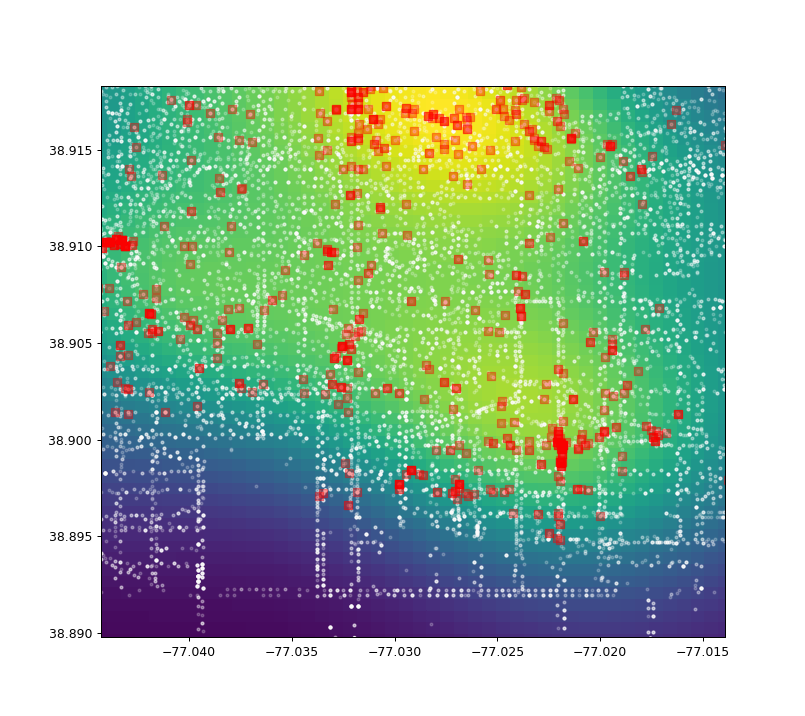

In [165]:
plt.figure(7)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='w', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'], color='r', s=40, marker='s', alpha=.2)
plt.show()

## Hypotheses

Hypothesis 1: In areas with the same crime denisty but different ambient luminance, there will be more high crime incidents mapped to a single lightout repair in the dimmer areas.

Hypothesis 2: In areas with the same crime density but different ambient luminance conditional on zoning, there will be more high crime incidents mapped to a single lightout repair in the dimmer areas.

## Issues and Pre-Auxiliary Analysis

Before an analysis proceeds, further information needs to be known about how crimes are reported in these areas.    For example, while we have demonstrated that the relative crime density is the same across Georgetown Park and the 6th Ward (providing evidence that crime is not driving the high clustering in Georgetown Park) it is still quite plausible that a greater police presence is resulting in more crimes being reported.  It could also be the case that crime has a higher likelyhood of being reported in Georgetown Park.

Pre-Auxiliary Hypothesis: the probability of a crime being reported is equal in the areas of interest.

Methodology: Two approaches come to mind when considering how to address this hypothesis:

1) Directly ask MPD about the frequency of reports in these areas, ask about Police "Beats" across these areas, and ask about how these areas compare given our empirical information.

2) Measure the number of reports across areas of interest per acre and compare the difference conditional on area of interest and crime density.

## Methodology

We define ambient luminance as measured using a photometer measured in lux.  We define crime density as a normalized gaussian kernal density estimate ranging from 0 to 1 established from crime reports across D.C.  High crime incidents mapped to a lightout repair are defined as more than one crime happening within a 20 day window (10 before, 10 after) of a light being repaired.  Report frequency is defined as the number of reports per acre.  The effect of lightouts on crime will be estimated using a simple difference in difference estimate, where the time difference will be the before and after period of the repair and the control difference will be two areas with different ambient luminance (crime density and report frequency should be the same).  



## Results

Results to come...